# **Problem Statement**
XYZ Financial Services, a leading commercial bank, aims to mitigate the risks associated with credit defaults in an increasingly dynamic financial landscape. As the financial industry evolves, one of the most significant challenges for banks is accurately predicting the credit risk of clients. The goal of this project is to develop a predictive model that estimates the probability of credit default based on credit card owners' characteristics, such as age, gender, education, marital status, credit limit, and payment history. By accurately predicting default probabilities, XYZ Financial Services can make informed lending decisions, optimize risk management strategies, and enhance financial stability.

### **Target Variable**
- **default.payment.next.month**: A binary variable indicating whether a credit card owner will default on their payment in the next month (1 = default, 0 = no default), as provided in the UCI Credit Card dataset.

### **Requirements and Evaluation Metric**
- **Evaluation Metric**: The model’s performance will be evaluated using the Area Under the Receiver Operating Characteristic Curve (AUC-ROC), which balances the trade-off between true positive rate and false positive rate, emphasizing the model’s ability to distinguish defaulters from non-defaulters.
- **Business Goal**: The predictions should enable XYZ Financial Services to identify high-risk credit clients and tailor risk mitigation strategies, such as adjusting credit limits or offering targeted financial counseling, to reduce default rates and improve portfolio health.

In [1]:
# Importing Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **1. Data Exploration**

## **1.1 Loading the Dataset**

In [2]:
# Define the path to the dataset

# Define the path to the datasets folder
data_dir = "datasets"
dataset_path = os.path.join(data_dir, "UCI_Credit_Card.csv")

# Load the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows to confirm loading
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **1.2 Inspecting Dataset Structure**

In [3]:
# Display the number of rows and columns
print(f"Dataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Dataset Shape: (30000, 25)
Number of Rows: 30000
Number of Columns: 25


In [4]:
# Display column names
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [5]:
# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


In [6]:
# Display DataFrame summary
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2      

In [7]:
# Display random 10 rows
print("Random sample of 10 rows:")
df.sample(10)

Random sample of 10 rows:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
4341,4342,50000.0,1,2,1,32,0,0,0,0,...,17459.0,17825.0,18193.0,1998.0,3000.0,625.0,647.0,664.0,649.0,0
12463,12464,360000.0,1,1,1,40,0,0,2,-1,...,8331.0,2643.0,6008.0,21358.0,86.0,8372.0,2656.0,6038.0,3325.0,0
21901,21902,140000.0,2,1,2,27,0,0,0,0,...,21209.0,25503.0,27918.0,2000.0,3000.0,3000.0,5000.0,3000.0,10000.0,0
13351,13352,230000.0,2,1,2,27,0,0,0,0,...,14620.0,15877.0,16611.0,1300.0,1500.0,1500.0,1500.0,1000.0,1500.0,0
21500,21501,160000.0,2,2,2,39,0,0,2,2,...,43481.0,43515.0,49619.0,7000.0,0.0,7847.0,1026.0,7000.0,7968.0,1
1715,1716,50000.0,2,2,1,26,0,0,0,0,...,18768.0,19182.0,19447.0,2300.0,2349.0,800.0,835.0,726.0,361.0,0
3010,3011,210000.0,2,2,2,32,0,0,0,2,...,92195.0,92491.0,94369.0,4000.0,7500.0,0.0,3000.0,5000.0,5000.0,0
3064,3065,430000.0,2,2,1,42,0,0,0,0,...,91200.0,92134.0,92834.0,3243.0,3200.0,3185.0,3500.0,3500.0,3420.0,0
3399,3400,50000.0,1,3,2,22,0,0,0,0,...,1990.0,1377.0,1080.0,1056.0,1000.0,40.0,1377.0,1080.0,382.0,1
13516,13517,60000.0,2,3,2,49,1,2,0,0,...,22597.0,20784.0,15599.0,0.0,1301.0,1000.0,600.0,600.0,763.0,0


### **Observations from the Dataset**
Based on the dataset and inspected structure:

- **Rows**: 30,000 credit card clients.

- **Columns**: 25, including:

    - **ID**: Unique identifier (we will not use for modeling).

    - **LIMIT_BAL**: Credit limit (continuous, float64).

    - **SEX, EDUCATION, MARRIAGE**: Categorical variables encoded as integers.

    - **AGE**: Continuous, integer.

    - **PAY_0 to PAY_6**: Payment status (ordinal, e.g., -1, 0, 1, 2 indicating months of delay or paid).

    - **BILL_AMT1 to BILL_AMT6**: Bill amounts for six months (float64).

    - **PAY_AMT1 to PAY_AMT6**: Payment amounts for six months (float64).

    - **default.payment.next.month**: Target variable (0 = no default, 1 = default, int64).

    - **Data Types**: Mostly int64 for categorical/ordinal and float64 for monetary values, which seems appropriate based on the snippet.

## **1.3 Understanding Variables**

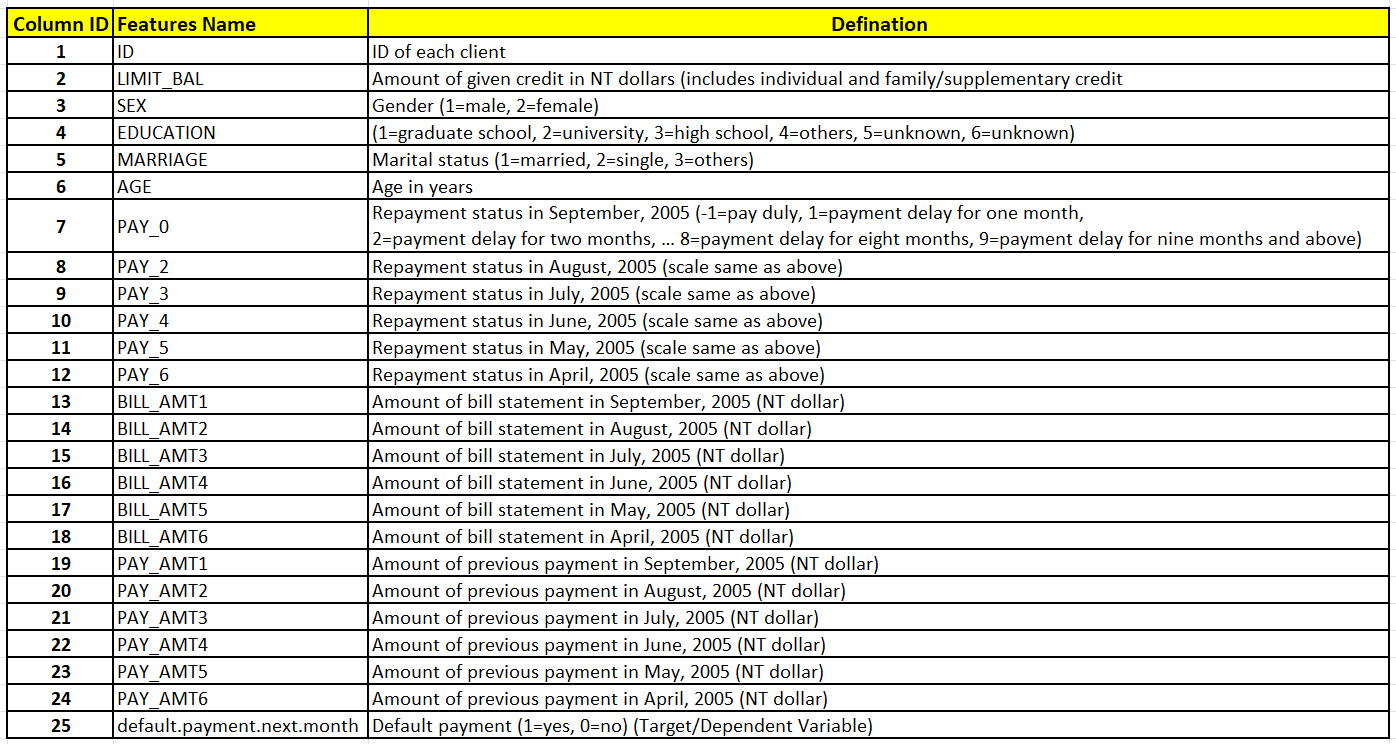

In [8]:
from IPython.display import Image

# Display the dataset information image
image_path = os.path.join(data_dir, "Dataset Information.png")

# Display the image
Image(filename=image_path)

In [9]:
# Define categorical columns based on dataset info
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']

# Display unique values
print("Unique values for categorical variables:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique().tolist()}")

Unique values for categorical variables:
SEX: [2, 1]
EDUCATION: [2, 1, 3, 5, 4, 6, 0]
MARRIAGE: [1, 2, 3, 0]
PAY_0: [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
PAY_2: [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3: [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4: [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5: [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6: [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
default.payment.next.month: [1, 0]


### **Observations from unique values of categorical variables:**
- SEX and default.payment.next.month should only have 1 and 2, or 0 and 1, respectively.
- EDUCATION has unexpected values (0, 4, 5, 6) that may need cleaning.
- MARRIAGE includes 0, which may represent missing or undefined status.
- PAY_0 to PAY_6 include values like -2, which may represent missing or undefined status, and high positive numbers like 8, which indicate payment delay for 8 months.

In [10]:
print("Value frequencies for categorical variables:")
for col in categorical_columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts().sort_index())

Value frequencies for categorical variables:

SEX value counts:
SEX
1    11888
2    18112
Name: count, dtype: int64

EDUCATION value counts:
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

MARRIAGE value counts:
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

PAY_0 value counts:
PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

PAY_2 value counts:
PAY_2
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64

PAY_3 value counts:
PAY_3
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: count, dtype: int64

PAY_4 value counts:
PAY_4
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 

### **Observations from Value Frequencies of Categorical Variables:**
- SEX is balanced (more females).
- EDUCATION has rare values (4, 5, 6), possibly invalid or missing.
- MARRIAGE lacks value 0, which is good.
- PAY_0 shows most clients pay on time (0) or have minor delays (1, 2).
- default.payment.next.month is imbalanced (more 0s), suggesting a need for handling imbalance later.

In [11]:
# Define numerical columns
numerical_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

print("Summary statistics for numerical variables:")
df[numerical_columns].describe().round()

Summary statistics for numerical variables:


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,167484.0,35.0,51223.0,49179.0,47013.0,43263.0,40311.0,38872.0,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0
std,129748.0,9.0,73636.0,71174.0,69349.0,64333.0,60797.0,59554.0,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0
min,10000.0,21.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,50000.0,28.0,3559.0,2985.0,2666.0,2327.0,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.0,118.0
50%,140000.0,34.0,22382.0,21200.0,20088.0,19052.0,18104.0,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0
75%,240000.0,41.0,67091.0,64006.0,60165.0,54506.0,50190.0,49198.0,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0
max,1000000.0,79.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0


### **Observations from Summary Statistics of Numerical Variables:**
- LIMIT_BAL ranges from 10,000 to 1,000,000 NTD, indicating a wide range of credit limits.
- AGE ranges from 21 to 79, which is reasonable.
- BILL_AMT1 to BILL_AMT6 can be negative (overpayments) or very large (high credit usage).
- PAY_AMT1 to PAY_AMT6 include zero (no payment) and large values, suggesting varied payment behaviors.

### **Key Insights from Understanding Variables**
- **Categorical Variables**: EDUCATION (5, 6) and PAY_0 to PAY_6 (high delays) need scrutiny.
- **Numerical Variables**: Wide ranges in LIMIT_BAL and BILL_AMT suggest diverse credit behaviors.
- **Imbalance**: default.payment.next.month (more 0s) requires handling.

## **1.4 Check Data Quality**

In [12]:
# Checking for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of missing values per column:")
print((df.isnull().sum() / len(df)) * 100)

Missing values per column:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Percentage of missing values per column:
ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION       

### **Observations from missing values check:**
- The dataset is complete, there are no missing values.

In [13]:
# Checking for Inconsistencies in Categorical Variables
print("Checking for unexpected values in categorical variables:")
for col in categorical_columns:
    unique_values = df[col].unique()
    expected_values = {
        'SEX': [1, 2],
        'EDUCATION': [1, 2, 3, 4, 5, 6],
        'MARRIAGE': [1, 2, 3],
        'PAY_0': list(range(-1, 10)),
        'PAY_2': list(range(-1, 10)),
        'PAY_3': list(range(-1, 10)),
        'PAY_4': list(range(-1, 10)),
        'PAY_5': list(range(-1, 10)),
        'PAY_6': list(range(-1, 10)),
        'default.payment.next.month': [0, 1]
    }
    unexpected = [x for x in unique_values if x not in expected_values[col]]
    if unexpected:
        print(f"{col}: Unexpected values found - {unexpected}")
    else:
        print(f"{col}: All values within expected range ({expected_values[col]})")

Checking for unexpected values in categorical variables:
SEX: All values within expected range ([1, 2])
EDUCATION: Unexpected values found - [0]
MARRIAGE: Unexpected values found - [0]
PAY_0: Unexpected values found - [-2]
PAY_2: Unexpected values found - [-2]
PAY_3: Unexpected values found - [-2]
PAY_4: Unexpected values found - [-2]
PAY_5: Unexpected values found - [-2]
PAY_6: Unexpected values found - [-2]
default.payment.next.month: All values within expected range ([0, 1])


### **Observations from Inconsistencies in Categorical Variables**
- **EDUCATION:**
    - Expected: [1, 2, 3, 4, 5, 6] (graduate school, university, high school, others, unknown, unknown).
    - Unexpected: [0] - This suggests some records have an education level of 0, which is not defined in the dataset documentation. This could indicate missing or invalid data.
- **MARRIAGE:**
    - Expected: [1, 2, 3] (married, single, others).
    - Unexpected: [0] - This is not listed as a valid category and may represent missing or undefined marital status.
- **PAY_0 to PAY_6:**
    - Expected: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9] (-1 = paid duly, 0 = delay <1 months, 1-9 = delay 1-9+ months).
    - Unexpected: [-2] - The dataset documentation does not mention -2, but it’s a common extension in this dataset meaning "no consumption" (i.e., no credit usage, hence no payment status). This should be considered valid, and the expected range needs adjustment.
- **SEX and default.payment.next.month:**
    - Both are within expected ranges, which is good.

In [14]:
numerical_columns

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [15]:
# Detecting Outliers in Numerical Variables

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Check for outliers in each numerical column
print("Outlier detection in numerical variables:")
for col in numerical_columns:
    outlier_count, lower, upper = detect_outliers(df, col)
    total_count = len(df[col])
    outlier_percentage = (outlier_count / total_count) * 100
    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%) (Lower bound: {lower:.2f}, Upper bound: {upper:.2f})")

Outlier detection in numerical variables:
LIMIT_BAL: 167 outliers (0.56%) (Lower bound: -235000.00, Upper bound: 525000.00)
AGE: 272 outliers (0.91%) (Lower bound: 8.50, Upper bound: 60.50)
BILL_AMT1: 2400 outliers (8.00%) (Lower bound: -91739.62, Upper bound: 162389.38)
BILL_AMT2: 2395 outliers (7.98%) (Lower bound: -88547.50, Upper bound: 155538.50)
BILL_AMT3: 2469 outliers (8.23%) (Lower bound: -83581.50, Upper bound: 146412.50)
BILL_AMT4: 2622 outliers (8.74%) (Lower bound: -75942.12, Upper bound: 132774.88)
BILL_AMT5: 2725 outliers (9.08%) (Lower bound: -70878.25, Upper bound: 122831.75)
BILL_AMT6: 2693 outliers (8.98%) (Lower bound: -70657.38, Upper bound: 121111.62)
PAY_AMT1: 2745 outliers (9.15%) (Lower bound: -5009.00, Upper bound: 11015.00)
PAY_AMT2: 2714 outliers (9.05%) (Lower bound: -5417.50, Upper bound: 11250.50)
PAY_AMT3: 2598 outliers (8.66%) (Lower bound: -5782.50, Upper bound: 10677.50)
PAY_AMT4: 2994 outliers (9.98%) (Lower bound: -5279.88, Upper bound: 9589.12)
PAY

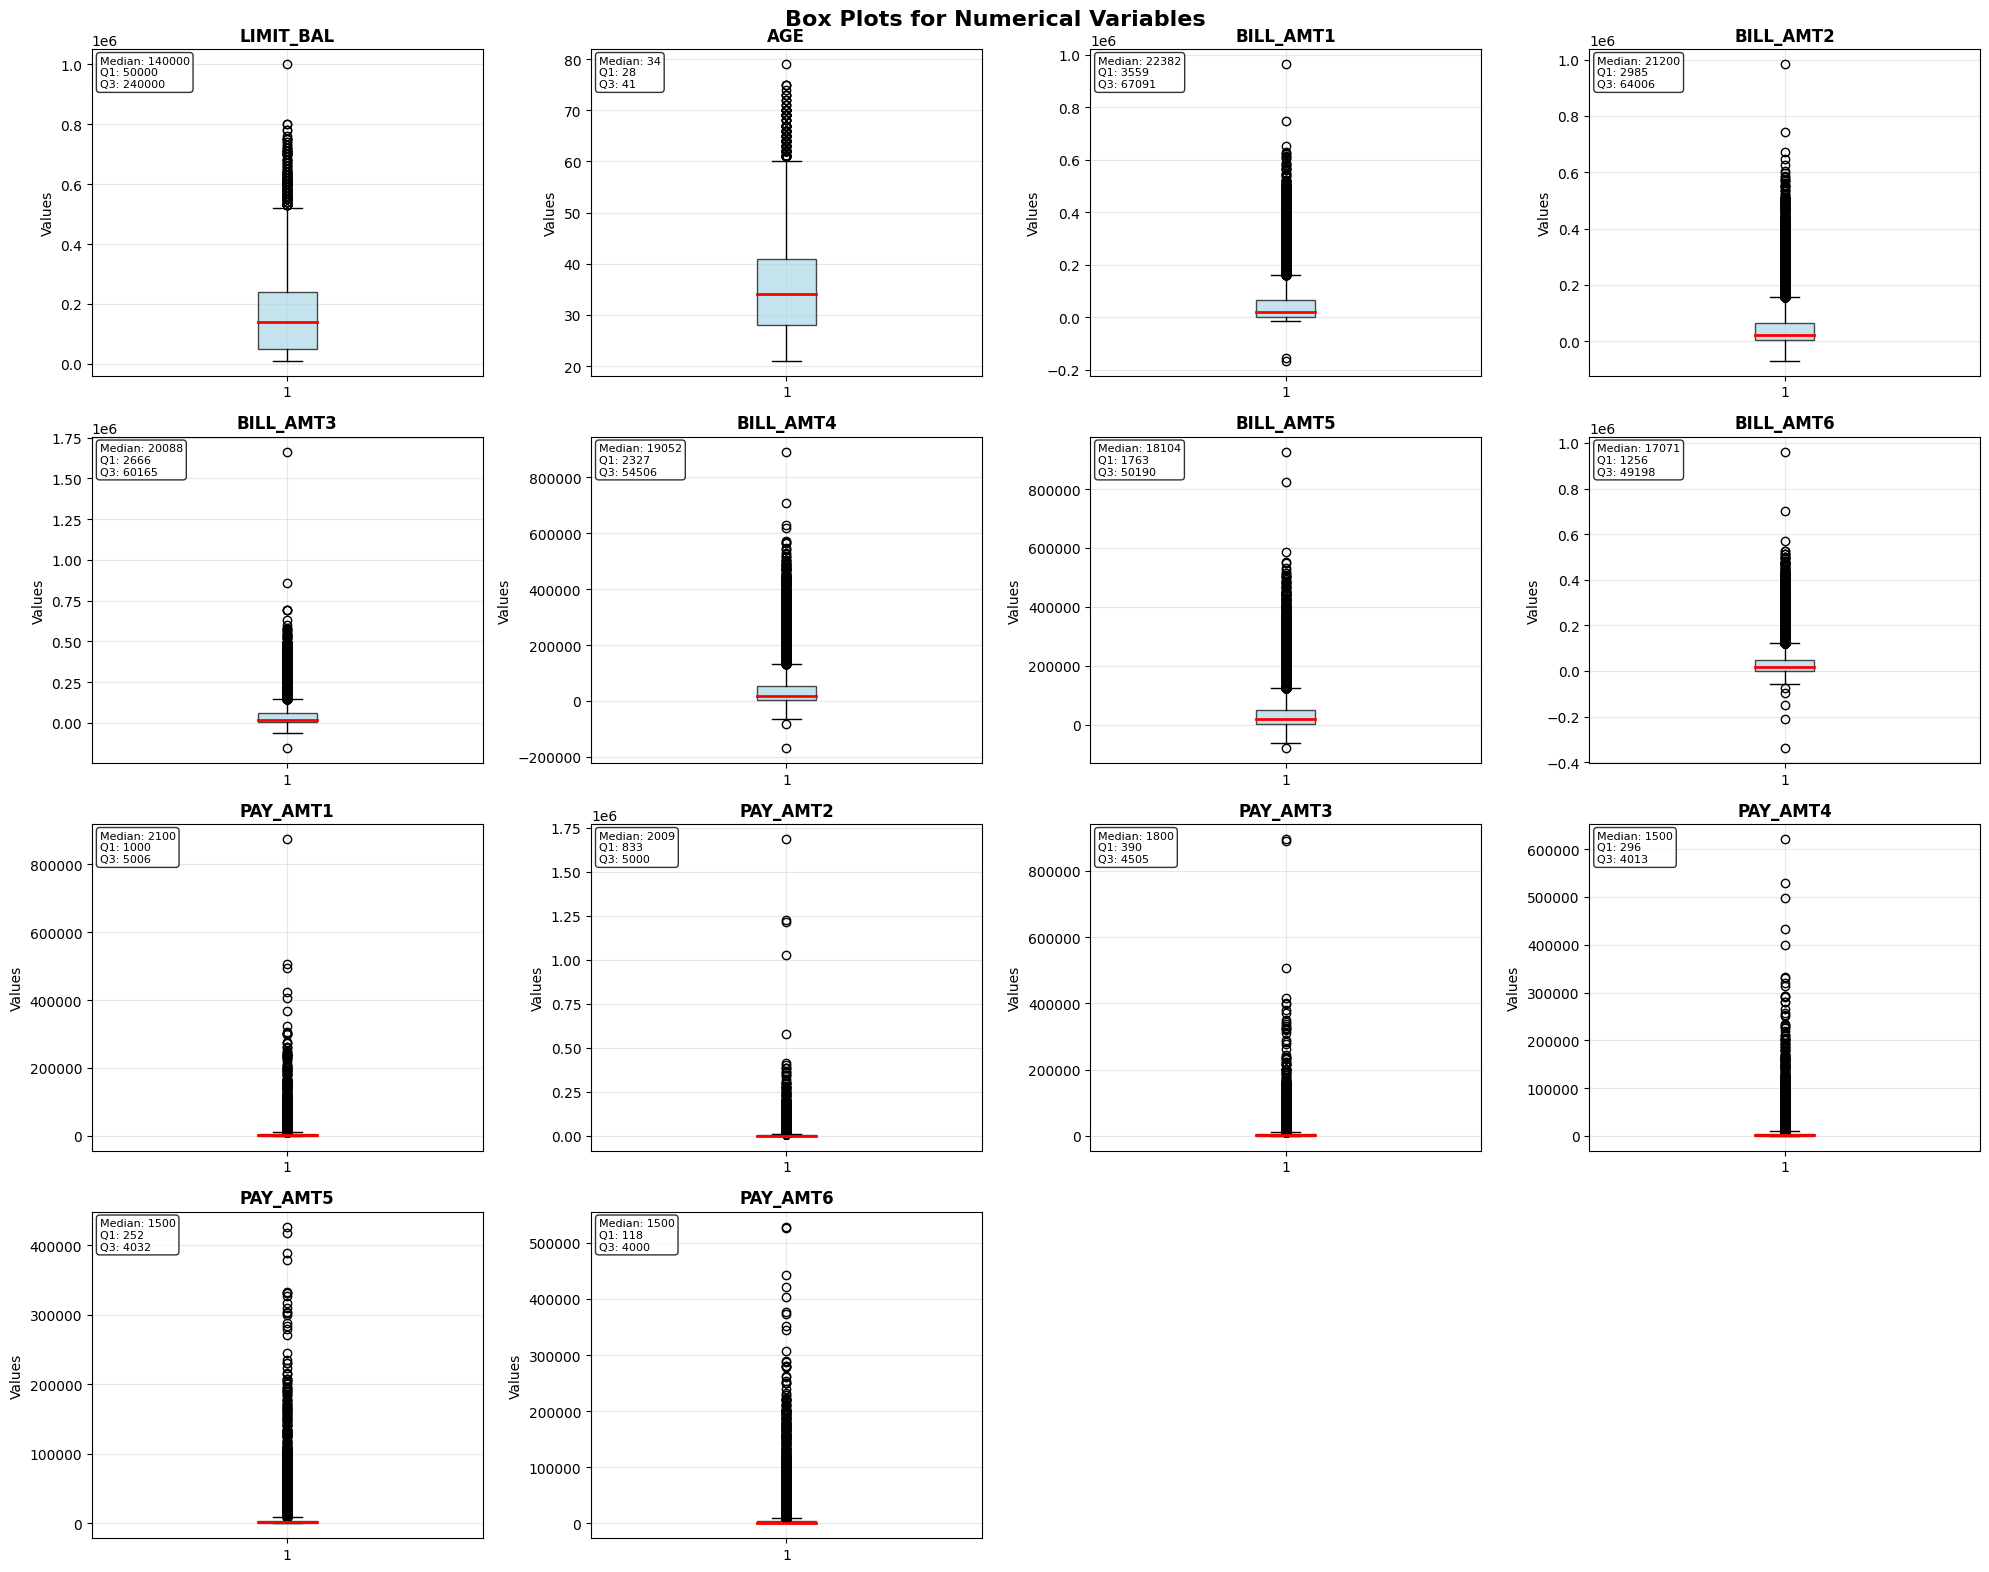

In [16]:
# Create box plots for numerical columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
fig.suptitle('Box Plots for Numerical Variables', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes = axes.flatten()

# Create box plots for each numerical column
for i, col in enumerate(numerical_columns):
    if i < len(axes):
        # Create box plot
        axes[i].boxplot(df[col].dropna(), patch_artist=True, 
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2))
        axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Values')
        axes[i].grid(True, alpha=0.3)
        
        # Add some statistics as text
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        median = df[col].median()
        axes[i].text(0.02, 0.98, f'Median: {median:.0f}\nQ1: {q1:.0f}\nQ3: {q3:.0f}', 
                    transform=axes[i].transAxes, verticalalignment='top', 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                    fontsize=8)

# Hide any unused subplots
for i in range(len(numerical_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### **Observations from Outliers Detection in Numerical Variables:**
- **Low Outlier Percentages:** LIMIT_BAL (0.56%) and AGE (0.91%) have minimal outliers, suggesting good data integrity overall.
- **High Outlier Percentages:** BILL_AMT (8–9%) and PAY_AMT (8.66–9.98%) have significant outliers, reflecting the dataset’s natural variability in credit usage and payments.
- **Negative Values:**
    - Negative BILL_AMT outliers are valid (overpayments).
- **AGE Outliers:** Values below 20 may be errors; those above 60.50 are likely fine.
- **Action Items:**
    - We will decide whether to cap, remove, or retain other outliers based on domain knowledge.

### **Key Insights from Data Quality Check**
- **Missing Values:** None
- **Inconsistencies:**
    - EDUCATION and MARRIAGE have unexpected 0s, possibly missing data.
    - PAY_0 to PAY_6 -2 is valid (no consumption) after updating expected ranges.
- **Outliers:** BILL_AMT and PAY_AMT have high outlier percentages; LIMIT_BAL and AGE have low outlier percentages.
- **Action Items:** 
    - Handle 0s in EDUCATION and MARRIAGE in the Data Cleaning phase.
    - Handle BILL_AMT and PAY_AMT outliers in the Data Cleaning phase.